## Regresión Polinomial

### $y=a0 +a1x+a2x2 +e$

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [117]:
x= [1, 2, 3, 4, 5, 6, 7];
y=[0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5];

In [118]:
n = len(x)
#Se crea lista con 
nsumax=[n, sum(x)];

#Se crea una lista a, vacía
list_a=[]

#Se define el grado del polinomio para la regresión. 
grado = 6

In [119]:
#Se calculan los elementos de la ecuación en forma de matriz aumentada
coeficient = 0
for l in range(2,grado*2+1):
    coeficient = 0
    for k in range(len(x)):
        coeficient += m.pow(x[k],l)
    nsumax.append(coeficient)

for k in range(grado+1):
    coeficient=sum(np.power(x,k)* y)
    list_a.append(coeficient) 

tamanio=grado+1;
A=np.zeros([tamanio, tamanio])

contador=0


for k in range(tamanio):
    A[contador,:]= nsumax[contador:(contador+tamanio)]
    contador=contador+1


In [120]:
#Se realiza la operación entre matrices para obtener los coeficiente finales
b= np.dot(np.linalg.inv(A),list_a)
x_aprox= np.arange(x[0],x[n-1]+0.1,0.1)

In [121]:
y_aprox=0
y_aproxR=0

In [122]:
#Sustituir valores del polinomio
ecuacion= str('')

for k in range(grado+1):
    y_aprox = y_aprox + b[k]*np.power(x_aprox,k)
    y_aproxR = y_aproxR + b[k] * np.power(x,k)
    if b[k] > 0:
        ecuacion = ecuacion + ' + ' + str(round(b[k],2)) + 'x^' + str(k)
    elif b[k] < 0:
        ecuacion = ecuacion + ' - ' + str(abs(round(b[k],2))) + 'x^' + str(k)
ecuacion

' - 82.0x^0 + 186.68x^1 - 155.13x^2 + 62.91x^3 - 13.31x^4 + 1.41x^5 - 0.06x^6'

In [123]:
#Se calculará el valor de los errores
#Error estandar y coeficiente de determinación
std_error=0
st=0
y_mean=np.mean(y)

for k in range(n):
    std_error = std_error+ (y[k] - y_aproxR[k] ) ** 2
    st = st+ (y[k] - y_mean ) ** 2 


r2=(st - std_error) / st

In [124]:
print("r^2:",r2)

r^2: 0.9999999999998623


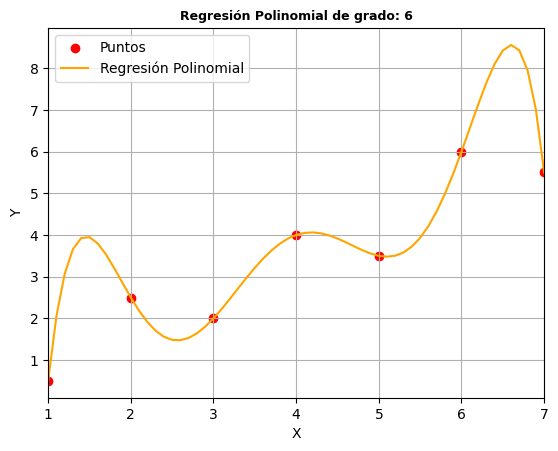

In [125]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red',marker ="o",label = 'Puntos')
ax.plot(x_aprox, y_aprox, color='orange', label = 'Regresión Polinomial')
ax.set_title(f'Regresión Polinomial de grado: {grado}', loc = "center", fontdict = {'fontsize':9, 'fontweight':'bold', 'color':'black'})
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
ax.set_xlim(x[0],x[-1])
ax.legend(loc = 'upper left')
plt.show()
